In [32]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [33]:
import numpy as np
import pandas as pd

In [34]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [35]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [36]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [37]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [38]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [39]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [40]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [41]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [42]:
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(str(last_year))

2016-08-23


In [43]:
rainfall = session.query(Measurement.date, Measurement.prcp).\
           filter(Measurement.date > last_year).\
           order_by(Measurement.date).all()

rainfall_df = pd.DataFrame(rainfall)
rainfall_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


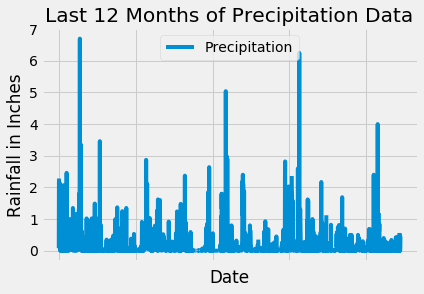

In [44]:
rainfall_df.plot('date', 'prcp')

plt.title("Last 12 Months of Precipitation Data")
plt.legend(["Precipitation"],loc = 'best')

plt.xlabel("Date")
plt.ylabel("Rainfall in Inches")

plt.show()

In [45]:
rainfall_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [46]:
station_count = session.query(Measurement).group_by(Measurement.station).count()
print(station_count)

9


In [47]:
# What are the most active stations?
# List the stations and the counts in descending order.

In [48]:
most_active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
                       order_by(func.count(Measurement.tobs).desc()).all()

print(most_active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [49]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [56]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [57]:
the_most_active = most_active_stations[0][0]

In [58]:
temperature = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
              filter(Measurement.station == the_most_active).\
              filter(Measurement.date > last_year).\
              order_by(Measurement.date).all()

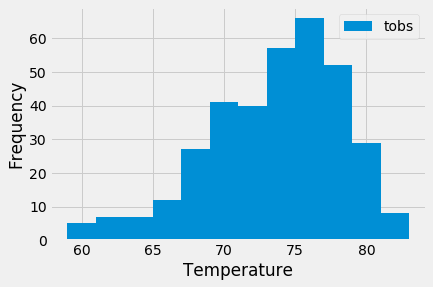

In [59]:
temp_df=pd.DataFrame(temperature)
plt.hist(temp_df['tobs'],12)

plt.legend(["tobs"],loc = 'best')

plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

In [60]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
           filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

print(calc_temps('2016-08-23', '2017-08-03'))

[(58.0, 74.4277080427708, 87.0)]


In [61]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

In [62]:
begin_date = dt.date(2016, 8, 23)
end_date = dt.date(2017, 8, 23)
last_year = dt.timedelta(days=365)
temp_during_trip = (calc_temps((begin_date - last_year), (end_date - last_year)))
print(temp_during_trip)

[(56.0, 74.43899317406144, 86.0)]


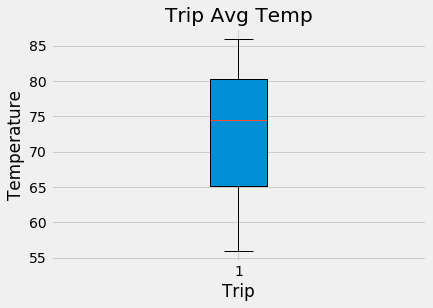

In [63]:
fig, ax = plt.subplots()
x = range(len(temp_during_trip))

ax.boxplot(temp_during_trip, patch_artist=True)
ax.set_title("Trip Avg Temp")

ax.set_ylabel("Temperature")
ax.set_xlabel("Trip")

plt.show()